# Pokemon - Weedle's Cave

https://www.kaggle.com/datasets/terminus7/pokemon-challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
combats = pd.read_csv('combats.csv')
data = pd.read_csv('pokemon.csv') # main dataset we're using for analysis
tests = pd.read_csv('tests.csv')

In [3]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [5]:
data_num = data.drop(['Name', 'Type 1', 'Type 2'], axis=1)

In [6]:
data_num.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


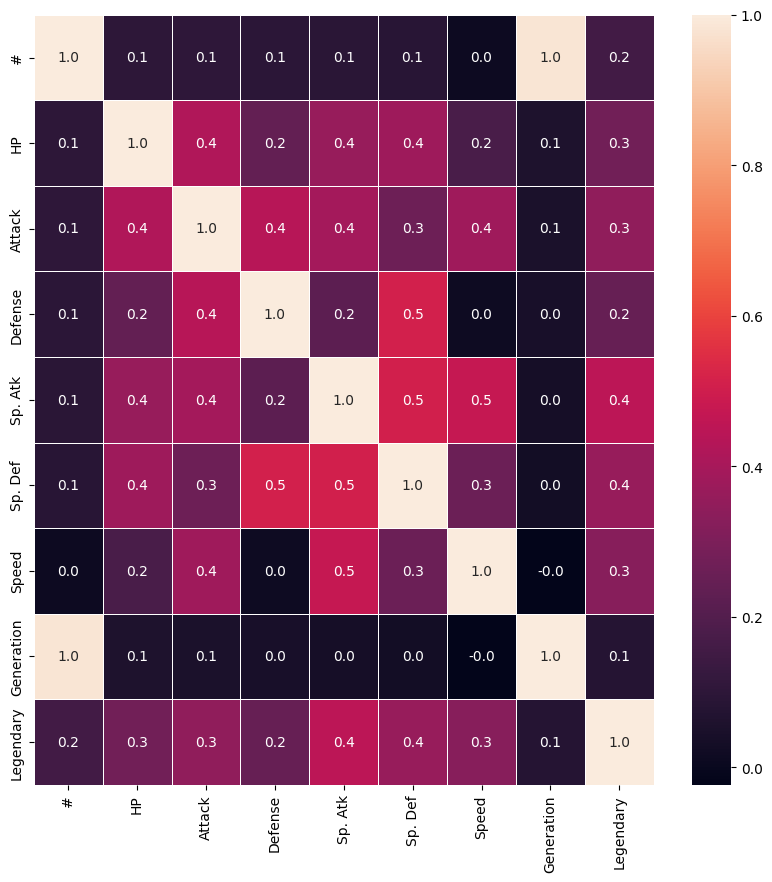

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=data_num.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

In [8]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

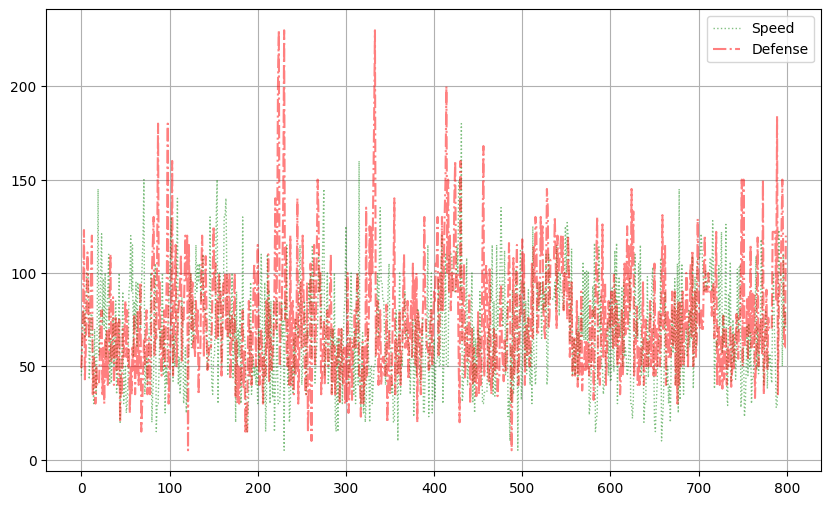

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
data['Speed'].plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data['Defense'].plot(color='r', label='Defense', alpha=.5, grid=True, linestyle='-.')
plt.legend(loc='upper right')

In [22]:
data.shape

(800, 12)

Text(0.5, 1.0, 'Attack Defense Scatter Plot')

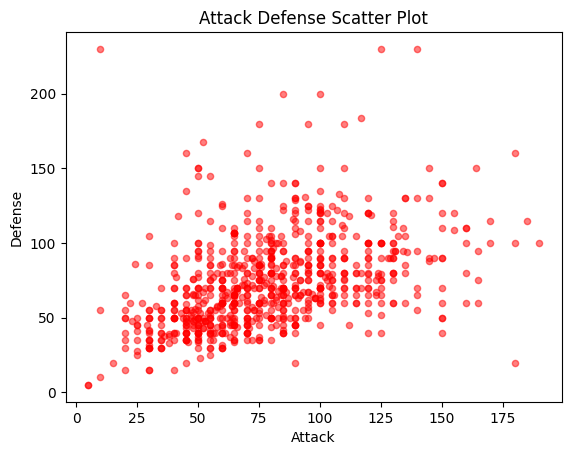

In [25]:
data.plot(kind='scatter', x='Attack', y='Defense', alpha=.5, color='red')
plt.ylabel('Defense')
plt.xlabel('Attack')
plt.title('Attack Defense Scatter Plot')

Text(0.5, 0, 'Speed Range')

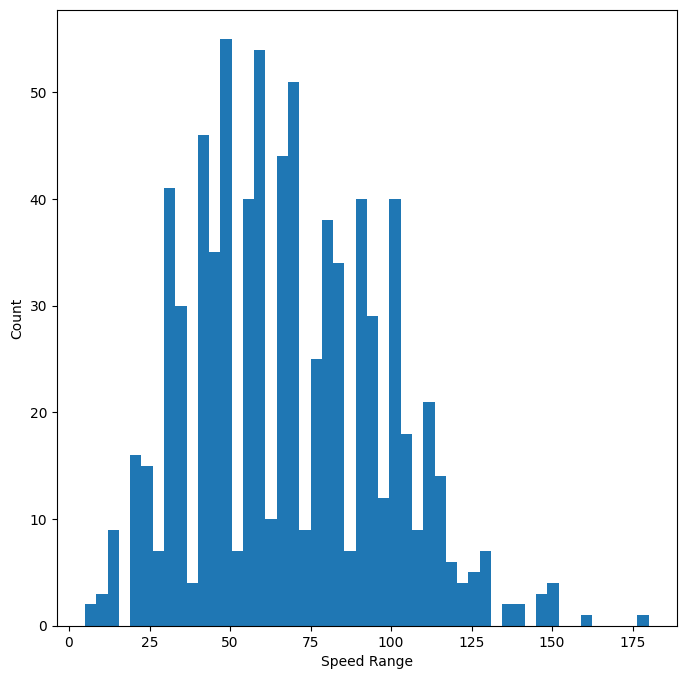

In [30]:
data.Speed.plot(kind='hist', bins=50, figsize=(8,8))
plt.ylabel('Count')
plt.xlabel('Speed Range')

In [33]:
x = data['Defense']>200
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [34]:
data[np.logical_and(data['Defense'] > 200, data['Attack'] > 100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [35]:
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [41]:
threshold = sum(data.Speed)/len(data.Speed)
data['speed_level'] = ['high' if i > threshold else 'low' for i in data.Speed]
data.loc[:10, ['speed_level', 'Speed']]

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


In [42]:
data['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

<Axes: title={'center': 'Attack'}, xlabel='Legendary'>

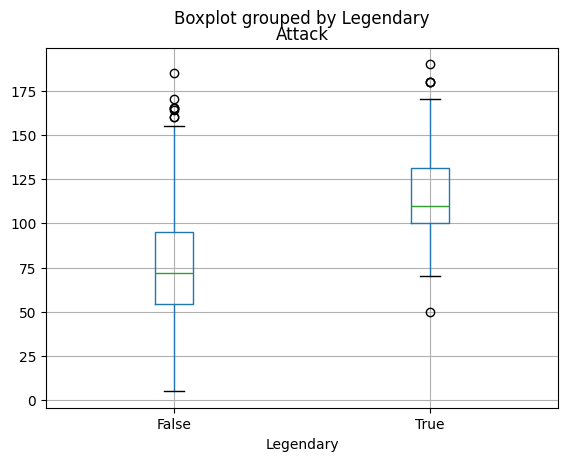

In [43]:
data.boxplot(column='Attack', by='Legendary')

In [45]:
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [46]:
data.dtypes

#                 int64
Name             object
Type 1         category
Type 2           object
HP                int64
Attack            int64
Defense           int64
Sp. Atk           int64
Sp. Def           int64
Speed           float64
Generation        int64
Legendary          bool
speed_level      object
dtype: object

In [48]:
data['Type 2'].value_counts(dropna=False)

Type 2
NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64

In [49]:
data1 = data
data1['Type 2'].dropna(inplace=True)

In [50]:
assert 1==1

In [51]:
data1['Type 2'].fillna('empty', inplace=True)

<Axes: >

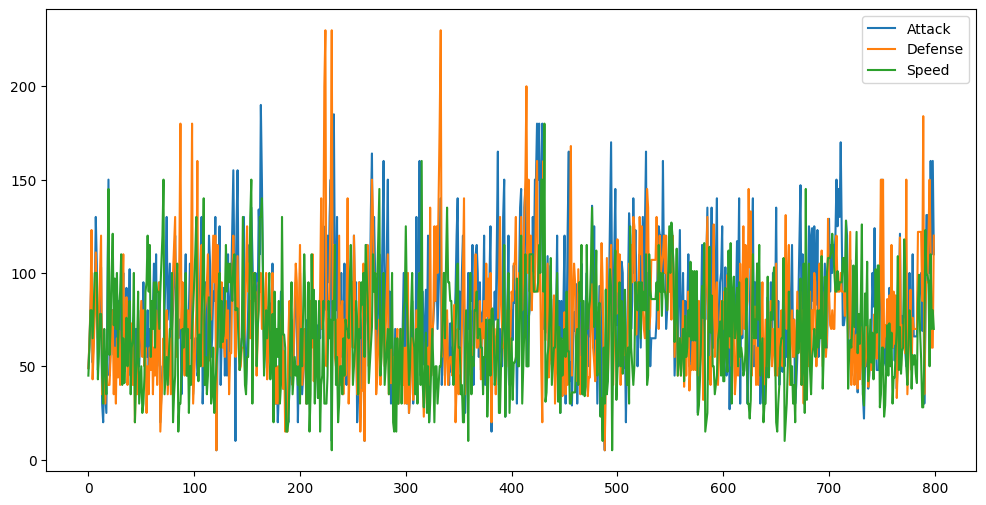

In [57]:
data1 = data.loc[:, ['Attack', 'Defense', 'Speed']]
data1.plot(figsize=(12,6))

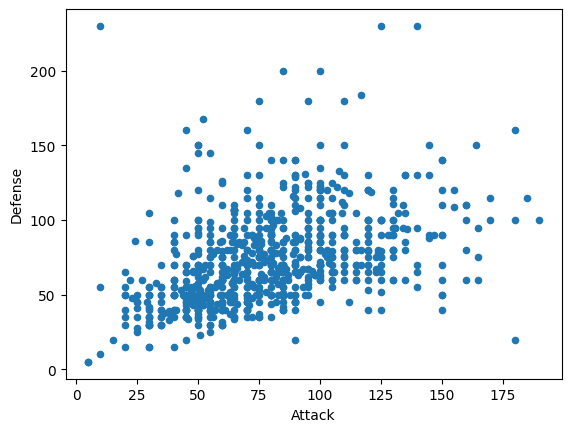

In [58]:
data1.plot(kind='scatter', x='Attack', y='Defense')
plt.show()

<Axes: ylabel='Frequency'>

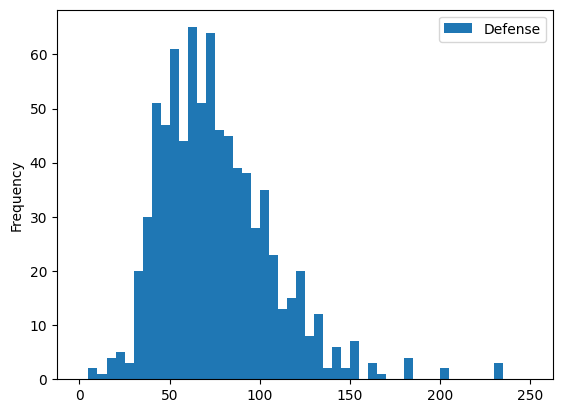

In [60]:
data1.plot(kind='hist', y='Defense', bins=50, range=(0,250))